In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('df_w_clusters.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,VendorID,cluster
0,2.30,1.0,8.5,3.0,1.85,0.3,14.15,6.866667,2020,1.0,0
1,1.30,1.0,7.5,2.5,2.15,0.3,12.95,8.383333,2020,1.0,0
2,1.20,1.0,6.0,3.0,1.95,0.3,11.75,4.700000,2021,1.0,0
3,1.04,1.0,7.5,0.0,1.00,0.3,11.80,9.283333,2020,2.0,3
4,1.80,2.0,9.0,2.5,0.00,0.3,12.30,10.050000,2020,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.93,1.0,9.0,0.0,3.69,0.3,15.99,12.850000,2019,2.0,3
4283209,1.18,1.0,12.5,0.0,3.16,0.3,18.96,18.783333,2019,2.0,1
4283210,0.99,1.0,7.0,0.0,2.00,0.3,12.30,8.966667,2019,2.0,3
4283211,2.83,1.0,13.0,0.5,3.36,0.3,20.16,16.283333,2019,2.0,1


In [4]:
clusters_by_year = df.groupby(['year', 'cluster']).size().unstack(fill_value=0)
clusters_by_year

cluster,0,1,2,3
year,,,,
2019,272320,380258,299004,437967
2020,287885,353133,319542,493919
2021,282851,343975,288962,523397


In [5]:
for year in df['year'].unique():
    print(f"Год {year}:")
    display(df[df['year'] == year].groupby('cluster').mean())

Год 2020:


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,VendorID
cluster,,,,,,,,,,
0,1.203072,1.000024,7.108029,2.813821,1.916231,0.3,12.638081,7.708569,2020.0,1.000000
1,2.980844,1.139188,13.446788,1.113814,2.613326,0.3,19.692148,16.572964,2020.0,1.684787
2,1.284948,2.014458,7.426878,1.170670,0.000103,0.3,11.008531,8.268791,2020.0,1.644347
3,1.193249,1.000000,6.895397,0.301006,1.910925,0.3,12.411924,7.349294,2020.0,2.000000


Год 2021:


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,VendorID
cluster,,,,,,,,,,
0,1.282273,1.000004,7.047250,2.805028,1.968587,0.3,12.620866,7.236862,2021.0,1.000000
1,3.148544,1.128419,13.373716,1.055279,2.675392,0.3,19.643144,15.801488,2021.0,1.695399
2,1.346915,2.020023,7.272494,1.121504,0.000013,0.3,10.818230,7.682056,2021.0,1.649681
3,1.273243,1.000000,6.859387,0.277031,1.952322,0.3,12.388956,6.974642,2021.0,2.000000


Год 2019:


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,VendorID
cluster,,,,,,,,,,
0,1.150274,1.000022,7.273504,2.794405,1.924397,0.3,12.792306,8.246122,2019.0,1.000000
1,2.713481,1.132933,13.481101,1.132469,2.626339,0.3,19.720975,17.591971,2019.0,1.670474
2,1.230525,2.016518,7.700604,1.185705,0.000074,0.3,11.263687,9.053519,2019.0,1.630921
3,1.145784,1.000000,7.044992,0.285992,1.908085,0.3,12.542676,7.839122,2019.0,2.000000


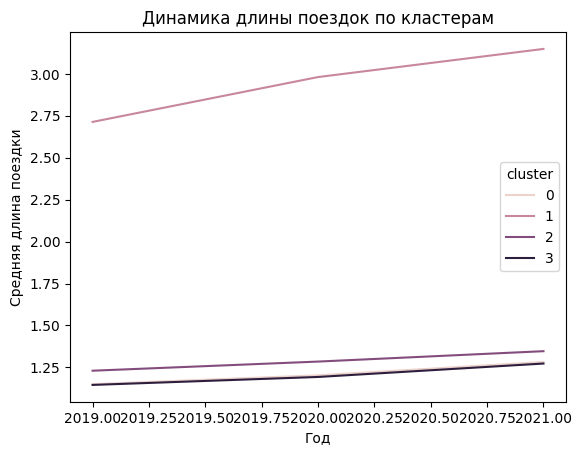

In [6]:
df_grouped = df.groupby(['cluster', 'year'])['trip_distance'].mean().reset_index()

sns.lineplot(data=df_grouped, x='year', y='trip_distance', hue='cluster')
plt.title('Динамика длины поездок по кластерам')
plt.xlabel('Год')
plt.ylabel('Средняя длина поездки')
plt.show()


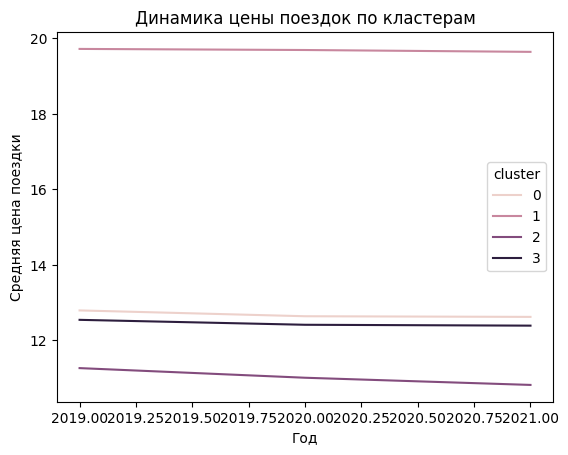

In [7]:
df_grouped = df.groupby(['cluster', 'year'])['total_amount'].mean().reset_index()

sns.lineplot(data=df_grouped, x='year', y='total_amount', hue='cluster')
plt.title('Динамика цены поездок по кластерам')
plt.xlabel('Год')
plt.ylabel('Средняя цена поездки')
plt.show()

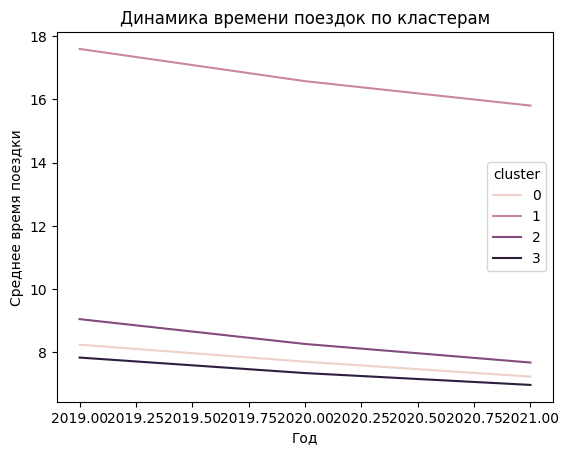

In [8]:
df_grouped = df.groupby(['cluster', 'year'])['trip_time'].mean().reset_index()

sns.lineplot(data=df_grouped, x='year', y='trip_time', hue='cluster')
plt.title('Динамика времени поездок по кластерам')
plt.xlabel('Год')
plt.ylabel('Среднее время поездки')
plt.show()

In [9]:
def train_pred(X, model, year, *, method=0):
    scaler = StandardScaler()
    model[0].fit(scaler.fit_transform(np.array(X)[:-1].T[:-1]), np.array(X)[-1][:-1])
    model[1].fit(scaler.fit_transform(np.array(X)[:-1].T[:-1]), np.array(X)[-1][:-1])
    model[2].fit(scaler.fit_transform(np.array(X)[:-1].T[:-1]), np.array(X)[-1][:-1])
    match method:
        case 0:
            t = (model[0].predict(scaler.fit_transform(np.array(X)[1:].T[:-1])) + model[1].predict(scaler.fit_transform(np.array(X)[1:].T[:-1]))
            + model[2].predict(scaler.fit_transform(np.array(X)[1:].T[:-1]))) / 3
        case 1:
            t = model[0].predict(scaler.fit_transform(np.array(X)[1:].T[:-1]))
        case 2:
            t = model[1].predict(scaler.fit_transform(np.array(X)[1:].T[:-1]))
        case 3:
            t = model[2].predict(scaler.fit_transform(np.array(X)[1:].T[:-1]))
    t = [*t, year]
    X.loc[len(X)] = t
    
    return X

In [10]:
def visual2_0(df, num, *, method=0, column=""):
    fig = plt.figure(figsize=(15,8))
    match method:
        case 0:
            l = [df[i] for i in df.columns]
            year = l[-1]
            l=l[:-1]
            from sklearn.preprocessing import MinMaxScaler
            scal = MinMaxScaler()
            
            for l1 in l:
                l1 = [[i] for i in l1]
                l1 = scal.fit_transform(l1)
                l1 = l1.reshape(1, len(df))
                plt.plot(*l1, marker="o") 

            plt.xticks(ticks=list(range(len(df))), labels=year)
            plt.title(f"{num} кластер")
            plt.ylabel(f"Атрибуты")
            plt.xlabel("Год")
            plt.legend(df.columns[:-1])
            plt.show()
        case 1:

            l = [i[column] for i in df]
            year = df[0]["year"]
            for l1 in l:
                l1 = [[i] for i in l1]
                l1 = np.array(l1).reshape(1, len(df[0]))
                plt.plot(*l1, marker="o")

            plt.xticks(ticks=list(range(len(df[0]))), labels=year)
            plt.title(f"{num} кластер")
            plt.ylabel(f"{column}")
            plt.xlabel("Год")
            plt.legend(["RandomForestRegressor", "LinearRegression", "GradientBoostingRegressor"],loc="best")
            plt.grid(True) 



In [11]:

rf_model = RandomForestRegressor(random_state=5)
ln_model = LinearRegression()
gb_model = GradientBoostingRegressor(random_state=5)

In [12]:
cluster_1 = df[df['cluster'] == 0] 
cluster_1 = cluster_1.groupby('year').mean() 
cluster_1 = cluster_1.head(3) 
cluster_1.drop(columns='cluster', inplace=True) 
cluster_1.reset_index(inplace=True) 
cluster_1.index = range(len(cluster_1)) 
cluster_1 = cluster_1[[col for col in cluster_1.columns if col != 'year'] + ['year']]
cluster_1

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,year
0,1.150274,1.000022,7.273504,2.794405,1.924397,0.3,12.792306,8.246122,1.0,2019
1,1.203072,1.000024,7.108029,2.813821,1.916231,0.3,12.638081,7.708569,1.0,2020
2,1.282273,1.000004,7.047250,2.805028,1.968587,0.3,12.620866,7.236862,1.0,2021


In [13]:
cluster_2 = df[df['cluster'] == 1] 
cluster_2 = cluster_2.groupby('year').mean() 
cluster_2 = cluster_2.head(3) 
cluster_2.drop(columns='cluster', inplace=True) 
cluster_2.reset_index(inplace=True) 
cluster_2.index = range(len(cluster_2)) 
cluster_2 = cluster_2[[col for col in cluster_2.columns if col != 'year'] + ['year']]
cluster_2

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,year
0,2.713481,1.132933,13.481101,1.132469,2.626339,0.3,19.720975,17.591971,1.670474,2019
1,2.980844,1.139188,13.446788,1.113814,2.613326,0.3,19.692148,16.572964,1.684787,2020
2,3.148544,1.128419,13.373716,1.055279,2.675392,0.3,19.643144,15.801488,1.695399,2021


In [14]:
cluster_3 = df[df['cluster'] == 2] 
cluster_3 = cluster_3.groupby('year').mean() 
cluster_3 = cluster_3.head(3) 
cluster_3.drop(columns='cluster', inplace=True) 
cluster_3.reset_index(inplace=True) 
cluster_3.index = range(len(cluster_3)) 
cluster_3 = cluster_3[[col for col in cluster_3.columns if col != 'year'] + ['year']]
cluster_3

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,year
0,1.230525,2.016518,7.700604,1.185705,0.000074,0.3,11.263687,9.053519,1.630921,2019
1,1.284948,2.014458,7.426878,1.170670,0.000103,0.3,11.008531,8.268791,1.644347,2020
2,1.346915,2.020023,7.272494,1.121504,0.000013,0.3,10.818230,7.682056,1.649681,2021


In [15]:
cluster_4 = df[df['cluster'] == 3] 
cluster_4 = cluster_4.groupby('year').mean() 
cluster_4 = cluster_4.head(3) 
cluster_4.drop(columns='cluster', inplace=True) 
cluster_4.reset_index(inplace=True) 
cluster_4.index = range(len(cluster_4)) 
cluster_4 = cluster_4[[col for col in cluster_3.columns if col != 'year'] + ['year']]
cluster_4.to_csv('cluster_4.csv')

In [16]:
cl1 = cluster_1.copy()
for i in range(2022, 2025):
    cl1 = train_pred(cl1, [rf_model,ln_model,gb_model], i)


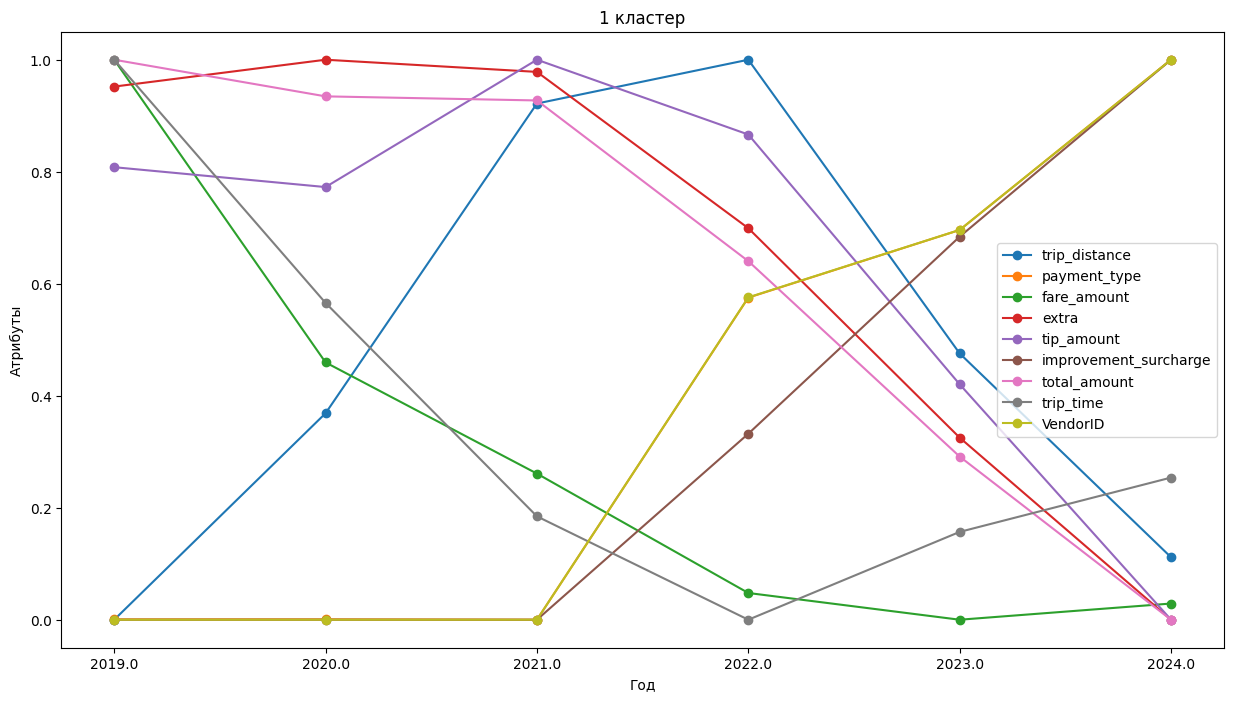

In [17]:
visual2_0(cl1, 1)

In [18]:
cl2 = cluster_2.copy()
for i in range(2022, 2025):
    cl2 = train_pred(cl2, [rf_model,ln_model,gb_model], i)


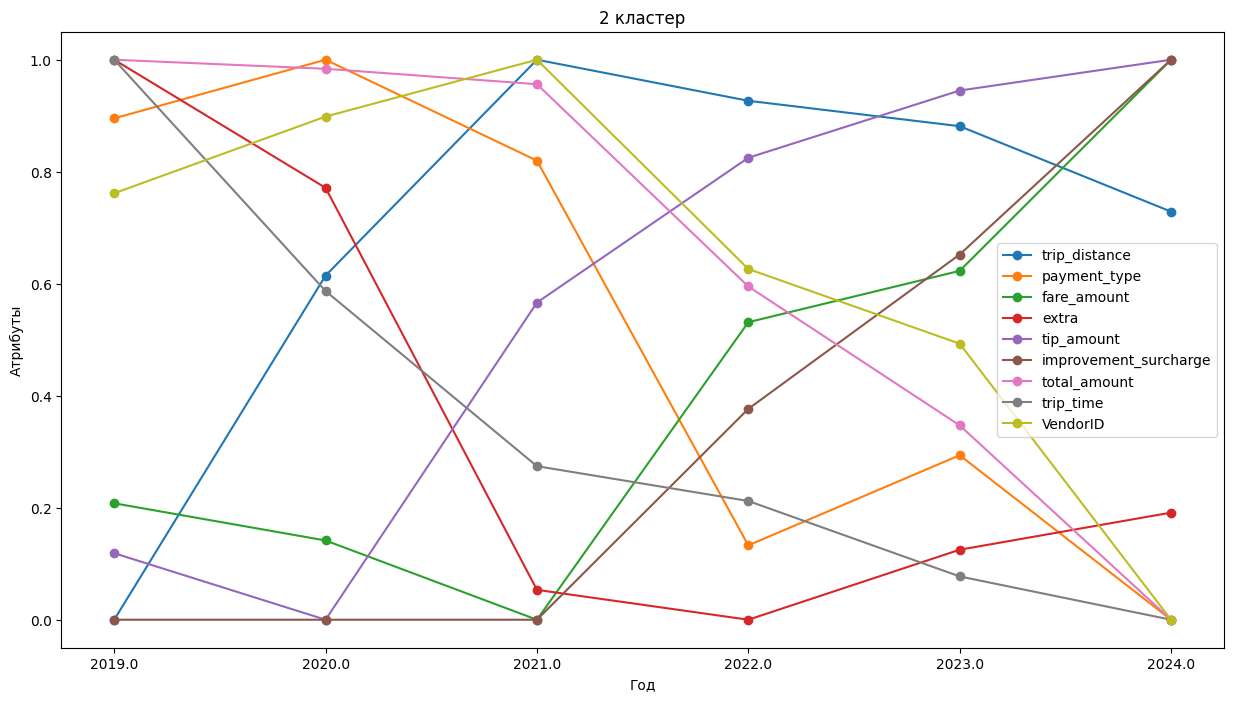

In [19]:
visual2_0(cl2, 2)

In [20]:
cl3 = cluster_3.copy()
for i in range(2022, 2025):
    cl3 = train_pred(cl3, [rf_model,ln_model,gb_model], i)

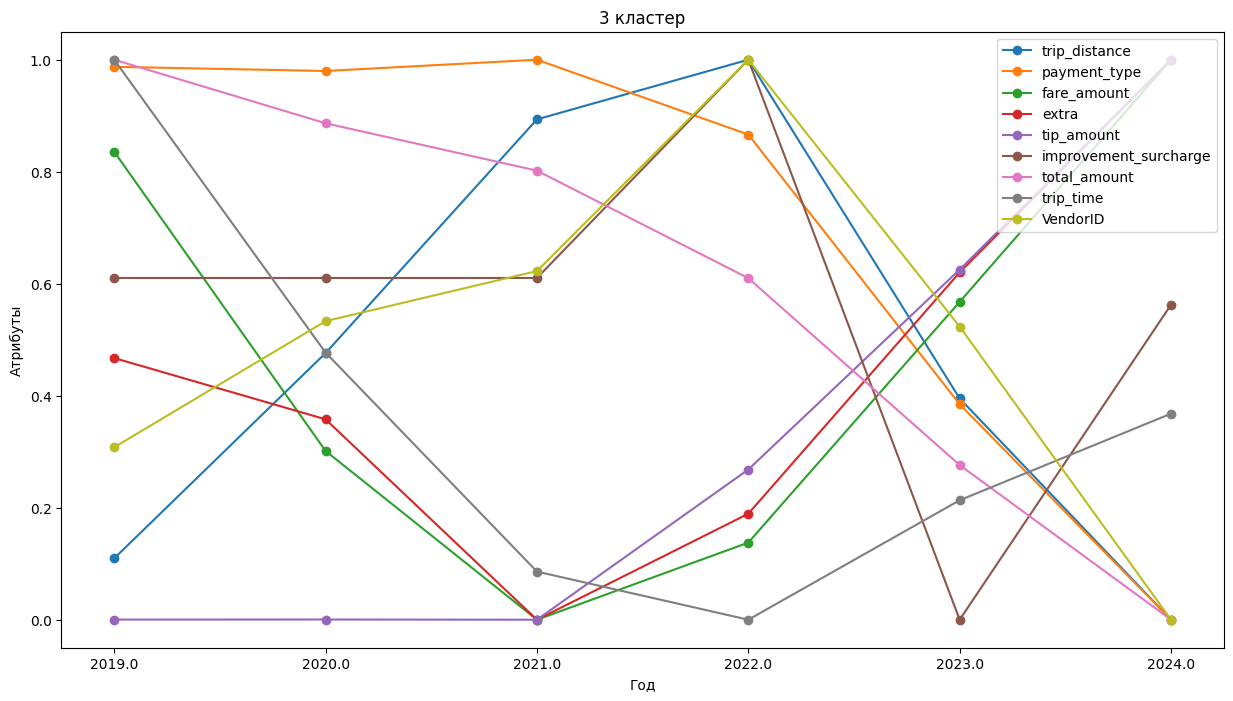

In [21]:
visual2_0(cl3, 3)

In [22]:
cl4 = cluster_4.copy()
for i in range(2022, 2025):
    cl4 = train_pred(cl4, [rf_model,ln_model,gb_model], i)

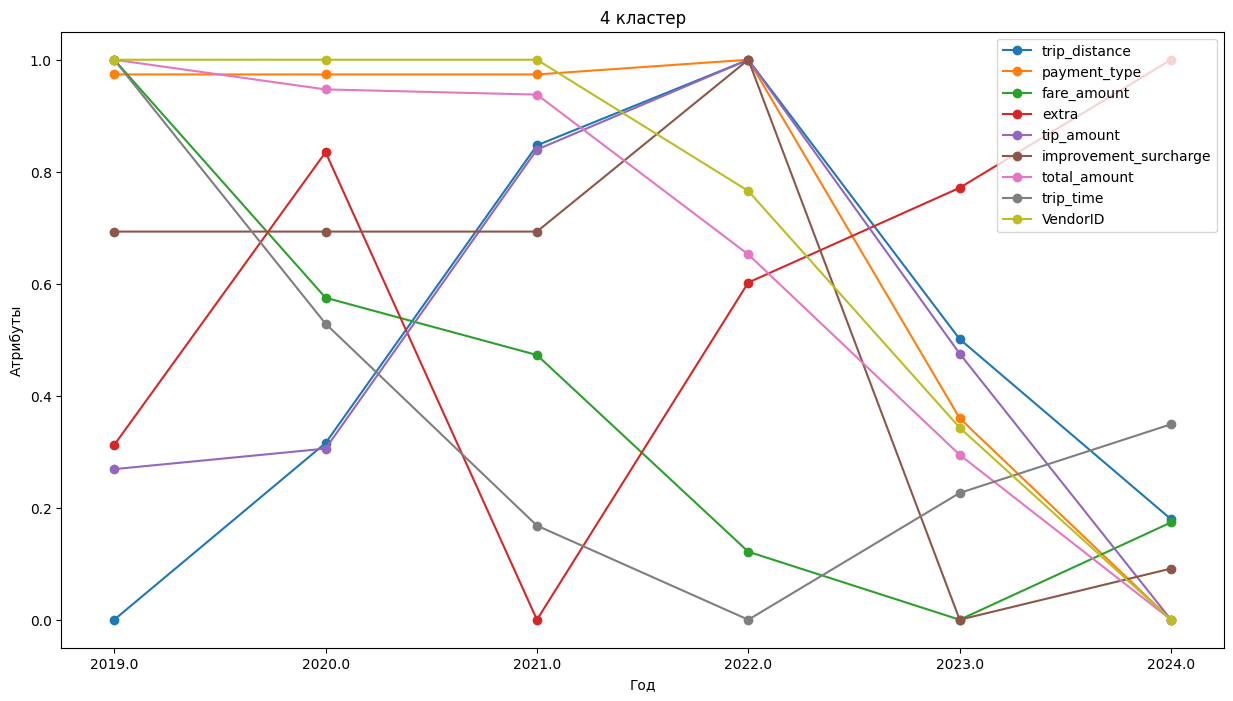

In [23]:
visual2_0(cl4, 4)

In [24]:
cluster_1.to_csv('cluster_1.csv')
cluster_2.to_csv('cluster_2.csv')
cluster_3.to_csv('cluster_3.csv')